In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Butter'],
    ['Bread'],
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Butter'],
    ['Milk', 'Butter'],
    ['Bread', 'Butter']
]


In [3]:
te = TransactionEncoder()
te_data = te.fit_transform(transactions)
df = pd.DataFrame(te_data, columns=te.columns_)


In [4]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)

In [5]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [6]:
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules = rules.sort_values(by='lift', ascending=False)

In [7]:
print("Top Association Rules:\n")
print(rules.head(10))


Top Association Rules:

  antecedents consequents  support  confidence      lift
0      (Milk)     (Bread)      0.4    0.666667  0.952381
1      (Milk)    (Butter)      0.4    0.666667  0.952381


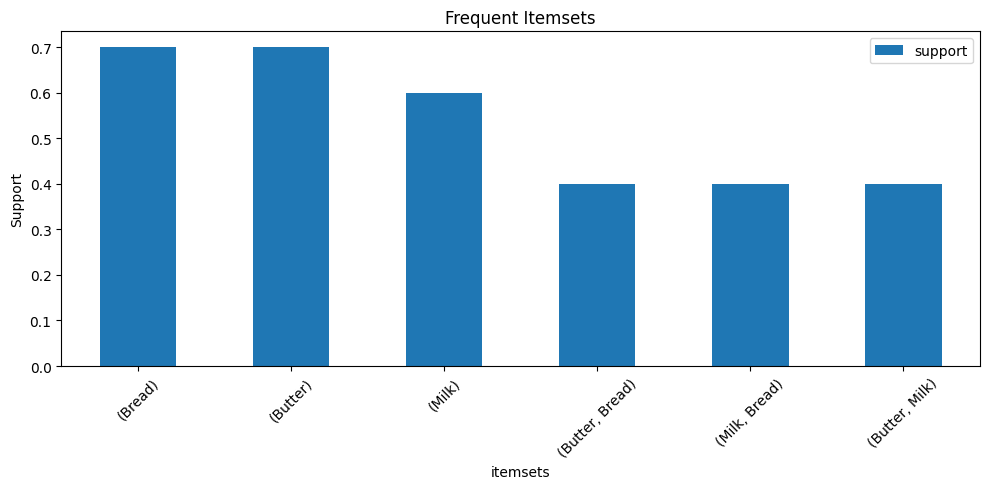

In [11]:
import matplotlib.pyplot as plt

frequent_itemsets.sort_values('support', ascending=False, inplace=True)
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', figsize=(10, 5))
plt.title('Frequent Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
